<h2><a href="https://leetcode.com/problems/minimum-number-of-k-consecutive-bit-flips">995. Minimum Number of K Consecutive Bit Flips</a></h2><h3>Hard</h3><hr><p>You are given a binary array <code>nums</code> and an integer <code>k</code>.</p>

<p>A <strong>k-bit flip</strong> is choosing a <strong>subarray</strong> of length <code>k</code> from <code>nums</code> and simultaneously changing every <code>0</code> in the subarray to <code>1</code>, and every <code>1</code> in the subarray to <code>0</code>.</p>

<p>Return <em>the minimum number of <strong>k-bit flips</strong> required so that there is no </em><code>0</code><em> in the array</em>. If it is not possible, return <code>-1</code>.</p>

<p>A <strong>subarray</strong> is a <strong>contiguous</strong> part of an array.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [0,1,0], k = 1
<strong>Output:</strong> 2
<strong>Explanation:</strong> Flip nums[0], then flip nums[2].
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,1,0], k = 2
<strong>Output:</strong> -1
<strong>Explanation:</strong> No matter how we flip subarrays of size 2, we cannot make the array become [1,1,1].
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> nums = [0,0,0,1,0,1,1,0], k = 3
<strong>Output:</strong> 3
<strong>Explanation:</strong> 
Flip nums[0],nums[1],nums[2]: nums becomes [1,1,1,1,0,1,1,0]
Flip nums[4],nums[5],nums[6]: nums becomes [1,1,1,1,1,0,0,0]
Flip nums[5],nums[6],nums[7]: nums becomes [1,1,1,1,1,1,1,1]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= nums.length &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= k &lt;= nums.length</code></li>
</ul>


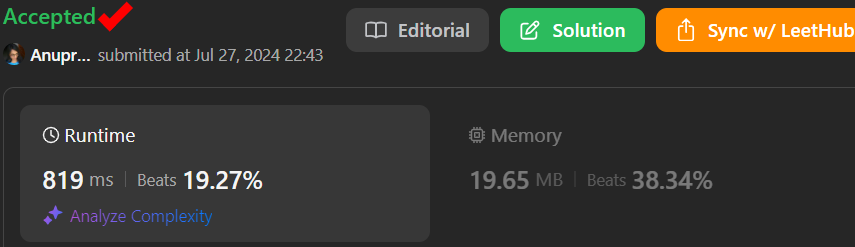

In [1]:
from typing import List
class Solution:
    def minKBitFlips(self, nums: List[int], k: int) -> int:
        cur_window_flips = 0
        res = 0
        n = len(nums)

        for i in range(n):
            # check if cur index is Out of Bounds for k size window
            if i - k >= 0 and nums[i -k] == 2:
                cur_window_flips -= 1    # then we reduce the effect of atleast 1 window which started at i-k index

            # nums[i] is original element, and if  even flips-that means no change, odd flips- bit flipped, 
            # We know, the window starts when even after flips , the number is 0,
            # So if orig was 0 and 1 flip done. it means now its 1, so NO CHANGE reqd so mathematically. (0 + 1) % 2 == 1
            # But if orig was 1 and 1 flip done(so now 0) OR orig was 0 and 2 flips done (so now 0 only)... 
            # then Ist case: (1+1)%2 => 0 2nd Case: (0+2)%2 => 0 ... that means (nums[i] + nflips) should have remainder 0, when window operation starts
            
            if (nums[i] + cur_window_flips)% 2 == 0:  
                if i + k > n:
                    return -1

                cur_window_flips += 1
                res += 1
                nums[i] = 2

        return res

####  **Increased efficency by just replacing 1 operation**
#### if (nums[i] + cur_window_flips)% 2 == 0:      =>   if (nums[i] + cur_window_flips) & 1 == 0: 
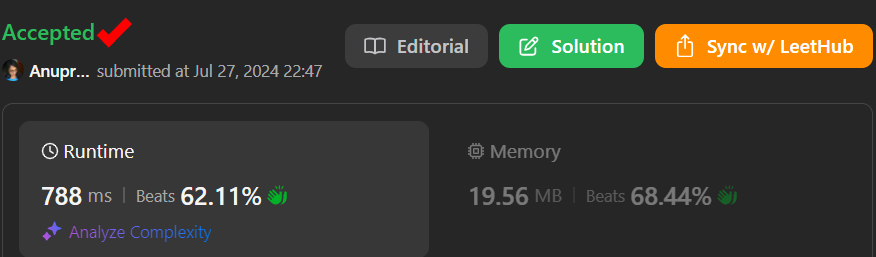

In [2]:
class Solution:
    def minKBitFlips(self, nums: List[int], k: int) -> int:
        cur_window_flips = 0
        res = 0

        for i in range(len(nums)):
            # check if cur index is Out of Bounds for k size window
            if i - k >= 0 and nums[i -k] == 2:
                cur_window_flips -= 1    # then we reduce the effect of atleast 1 window which started at i-k index


            if (nums[i] + cur_window_flips) & 1 == 0:  
                if i + k > len(nums):
                    return -1

                cur_window_flips += 1
                res += 1
                nums[i] = 2

        return res